# Anticorrelación de Grangier

### Bibliotecas

In [1]:
import time
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib

In [2]:
#Versiones

print("Numpy",np.version.version)
print("Pandas",pd.__version__)
print("Matplotlib",matplotlib.__version__)


Numpy 1.18.1
Pandas 0.22.0
Matplotlib 3.3.0


### Dos detectores 

In [179]:
#Parámetros

fotones=50000 #Fotones por segundo (N)
nc=5000 #Numero de conincidencias (NQ)
dt=50000000 #división del tiempo (NN)
P=fotones/dt #Probabilidad de fotones en la serie (ff)
PC=nc/dt #Probabilidad de coincidencia (ffQ)

In [180]:
# Inicio de las series
T=[]
R=[]
G=[]
GT=[]
GR=[]

In [181]:
# SerieS transmitida (T), reflejada(R) y testigo (G)
ng=0
for i in range(dt):
    
    r1=random.random()
    if r1<=P:
        T.append(1)

    else:
        T.append(0)

    r2=random.random()
    if r2<=P:
        R.append(1)

    else:
        R.append(0)
        
    
    r3=random.random()
    if r3<=PC:
        G.append(1)
        ng=ng+1

    else:
        G.append(0)    

In [182]:


# Suma de las series:
# Añadimos la información de G a T y R, modificando su información para que coincida con la 
# serie testigo. 
# La condición r4>=0.5 indica que los fotones señal (testigo) son transmitidos o reflejados
# de forma aleatoria
 
for i in range(dt):
    GT.append(0)
    GR.append(0)
    r4=random.random()
    if r4>=0.5: 
        GT[i]=G[i]
        
    else:
        GR[i]=G[i]

In [183]:
#Sumamos las series
#Obtenemos una nueva serie transmitida y reflejada sumando T+GT y R+GR

for i in range(dt):
    T[i]=T[i]+GT[i]
    if T[i]!=0:
        R[i]=R[i]+GR[i]

In [184]:
#Conteo de coincidencias
ctr=0
for i in range(dt):
    
    if T[i]*R[i]!=0:
        ctr=ctr+1
    else:
        ctr=ctr+0

Función de correlación para dos detectores:

\begin{equation}g_{2 D}^{(2)}(0)=\frac{N_{T R}}{N_{T} N_{R}}\left(\frac{\Delta T}{\Delta t}\right)\end{equation}


In [185]:
g2=ctr/(T.count(1)*R.count(1))*1*dt

In [186]:
g2

1.2914950787887702

### Tres detectores

In [187]:
cgtr=0
cgt=0
cgr=0

for i in range(dt):
    if G[i]*T[i]*R[i]!=0:
        cgtr=cgtr+1
    if G[i]*T[i]!=0:
        cgt=cgt+1
    if G[i]*R[i]!=0:
        cgr=cgr+1       

Función de correlación para tres detectores:

\begin{equation}g_{3 D}^{(2)}(0)=\frac{N_{G T R} N_{G}}{N_{G T} N_{G R}}\end{equation}


In [188]:
g3=(ng*cgtr)/(cgt*cgr)

In [189]:
g3

1.545309381237525

---

### Experimentos con 2 detectores

In [89]:
# Variación de la ventana de tiempo
ventanas=[90000000,50000000,5000000,500000,100000,80000,75000]

In [90]:
# Calculo de los tiempos por ventana
tiempos=[]
for i in range(len(ventanas)):
    tiempos.append(1/ventanas[i])

In [97]:
%%time
fotones=50000 #Fotones por segundo 
nc=5000 #Numero de conincidencias 


g2s=[]

for j in range(len(ventanas)):
    
    dt=ventanas[j]
    P=fotones/dt #Probabilidad de fotones en la serie 
    PC=nc/dt #Probabilidad de coincidencia 
    T=[]
    R=[]
    G=[]
    GT=[]
    GR=[]
    ctr=0
    NG=0
    for i in range(dt):

        r1=random.random()
        if r1<=P:
            T.append(1)

        else:
            T.append(0)

        r2=random.random()
        if r2<=P:
            R.append(1)

        else:
            R.append(0)

        r3=random.random()
        if r3<=PC:
            G.append(1)
            NG=NG+1
        else:
            G.append(0)

        GT.append(0)
        GR.append(0)
        r4=random.random()
        if r4>=0.5:
            GT[i]=G[i]
        else:
            GR[i]=G[i]

        T[i]=T[i]+GT[i]
        if T[i]!=0:
            R[i]=R[i]+GR[i]


        if T[i]*R[i]!=0:
            ctr=ctr+1
        else:
            ctr=ctr+0
            
    g2=1*dt*ctr/(T.count(1)*R.count(1))
    g2s.append(g2)

CPU times: user 4min 34s, sys: 3.11 s, total: 4min 37s
Wall time: 4min 38s


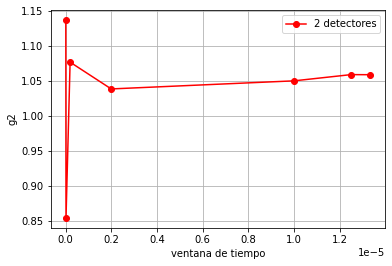

In [92]:
plt.plot(tiempos,g2s,"ro",label="2 detectores",linestyle="-")

plt.xlabel("ventana de tiempo")
plt.ylabel("g2")

plt.legend(loc=0)
plt.grid()
plt.savefig("g22")
plt.show()

### Experimentos con 3 detectores

In [148]:
# Variación de la ventana de tiempo

ventanas=[90000000,50000000,5000000,3000000,800000,500000,300000,100000]
#ventanas=[50000000,5000000,3000000,800000,500000,100000,80000,75000,55000]

In [149]:
# Calculo de los tiempos por ventana
tiempos=[]
for i in range(len(ventanas)):
    tiempos.append(1/ventanas[i])

In [191]:
%%time
#g3=cgtr/(cgt*cgr)*G.count(1)
fotones=100000 #Fotones por segundo 
nc=10000 #Numero de conincidencias 


g2s=[]
g3s=[]

for j in range(len(ventanas)):
    
    dt=ventanas[j]
    P=fotones/dt #Probabilidad de fotones en la serie 
    PC=nc/dt #Probabilidad de coincidencia 
    T=[]
    R=[]
    G=[]
    GT=[]
    GR=[]
    ctr=0
    cgtr=0
    cgt=0
    cgr=0
    NG=0
    NT=0
    NR=0
    for i in range(dt):

        r1=random.random()
        if r1<=P:
            T.append(1)
            NT=NT+1
        else:
            T.append(0)

        r2=random.random()
        if r2<=P:
            R.append(1)
            NR=NR+1
        else:
            R.append(0)

        r3=random.random()
        if r3<=PC:
            G.append(1)
            NG=NG+1
        else:
            G.append(0)

        GT.append(0)
        GR.append(0)
        r4=random.random()
        if r4>=0.5:
            GT[i]=G[i]
        else:
            GR[i]=G[i]

        T[i]=T[i]+GT[i]
        if T[i]!=0:
            R[i]=R[i]+GR[i]


        if T[i]*R[i]!=0:
            ctr=ctr+1
        else:
            ctr=ctr+0     
            


        if (G[i]*T[i]*R[i])!=0:
            cgtr=cgtr+1
        else:
            cgtr=cgtr+0
            
        if (G[i]*T[i])!=0:
            cgt=cgt+1
        else:
            cgt=cgt+0
            
        if (G[i]*R[i])!=0:
            cgr=cgr+1  
        else:
            cgr=cgr+0
            
    #g2=1*dt*ctr/(T.count(1)*R.count(1))
    g2=1*dt*ctr/(NT*NR)
    g2s.append(g2)
    
    g3=cgtr*NG/(cgt*cgr)

    g3s.append(g3)
    

CPU times: user 5min 54s, sys: 2.91 s, total: 5min 57s
Wall time: 5min 57s


In [192]:
g3s.sort()

### Comparación de resultados

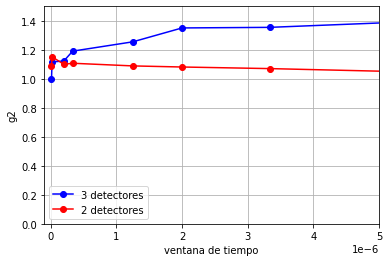

In [193]:
plt.plot(tiempos,g3s,"bo",label="3 detectores",linestyle="-")
plt.plot(tiempos,g2s,"ro",label="2 detectores",linestyle="-")


plt.xlabel("ventana de tiempo")
plt.ylabel("g2")
plt.ylim(0,1.5)
plt.xlim(-0.0000001,0.000005)
plt.legend(loc=0)
plt.grid()
plt.savefig("g23")
plt.show()

---

### Solo 3 detectores

### Estadística